In [4]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/cs448b_ipasn.csv')

In [ ]:
df.head(10)

,l_ipn,r_asn,f
0,0,72,1
1,0,75,1
2,0,93,1
3,0,106,1
4,0,155,1
5,0,220,1
6,0,243,13
7,0,276,3
8,0,376,2
9,0,457,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   l_ipn   20803 non-null  int8 
 1   r_asn   20803 non-null  int16
 2   f       20803 non-null  int64
dtypes: int16(1), int64(1), int8(1)
memory usage: 223.6 KB


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.3366447684665919


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.3366447684665919


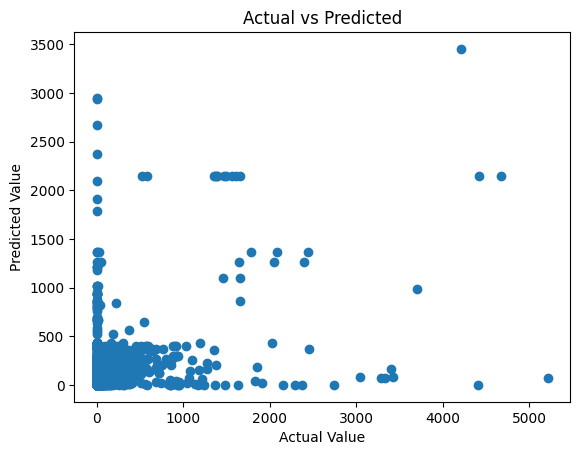

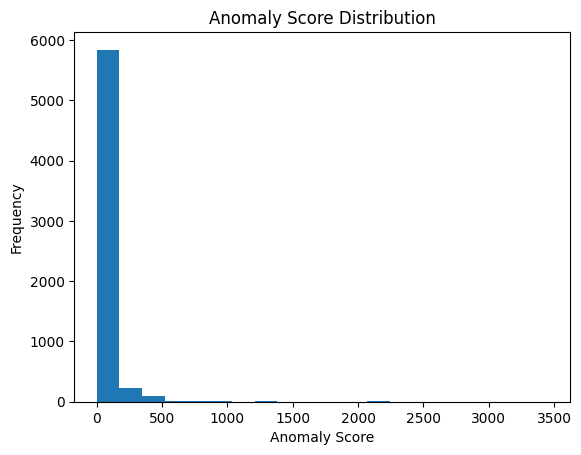

In [ ]:
# Encode categorical data
df['l_ipn'] = df['l_ipn'].astype('category').cat.codes
df['r_asn'] = df['r_asn'].astype('category').cat.codes

# Split features and target
X = df.drop('f', axis=1)
y = df['f']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model building and evaluation
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('Logistic Regression Accuracy:', clf.score(X_test, y_test))

# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('Logistic Regression Accuracy:', clf.score(X_test, y_test))

# Random Forest Regression
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted')
plt.show()

plt.hist(y_pred, bins = 20)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution')
plt.show()

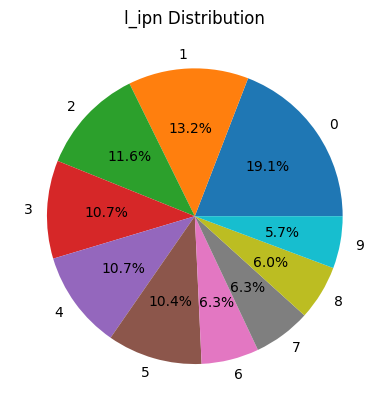

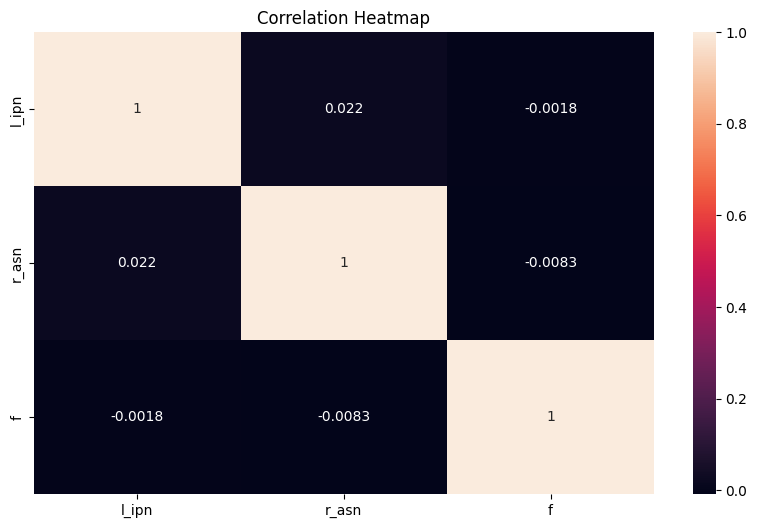

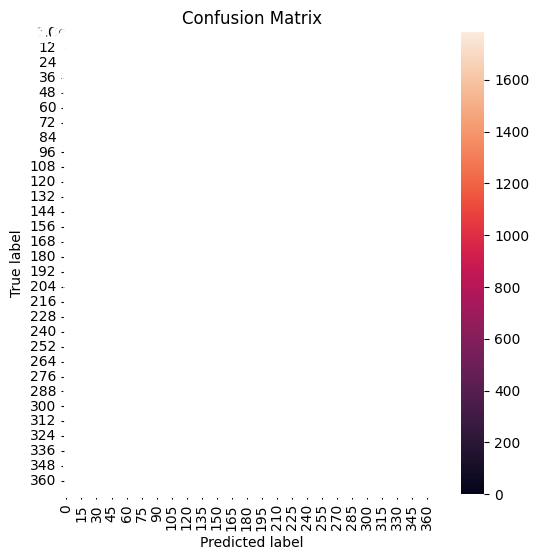

In [ ]:
# Imports
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Pie chart
plt.pie(df['l_ipn'].value_counts(), labels=df['l_ipn'].unique(), autopct='%1.1f%%')
plt.title('l_ipn Distribution')
plt.show()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Confusion Matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

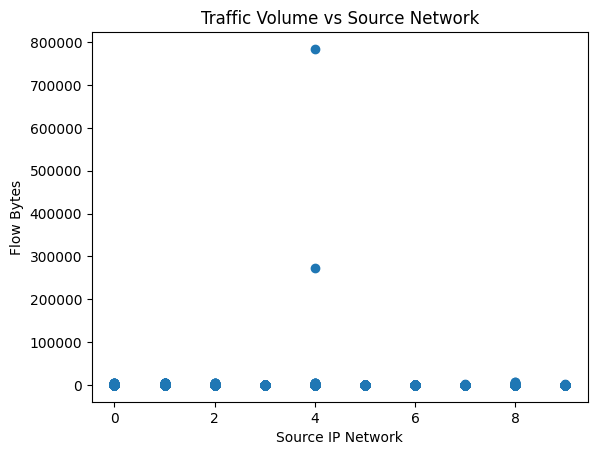

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['l_ipn'], df['f'])
plt.xlabel('Source IP Network')
plt.ylabel('Flow Bytes')

plt.title('Traffic Volume vs Source Network')
plt.show()

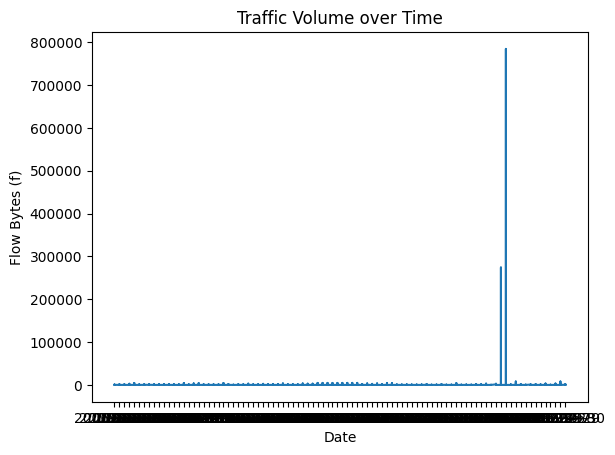

In [6]:
plt.plot(df['date'], df['f'])
plt.xlabel('Date')
plt.ylabel('Flow Bytes (f)')
plt.title('Traffic Volume over Time')
plt.show()

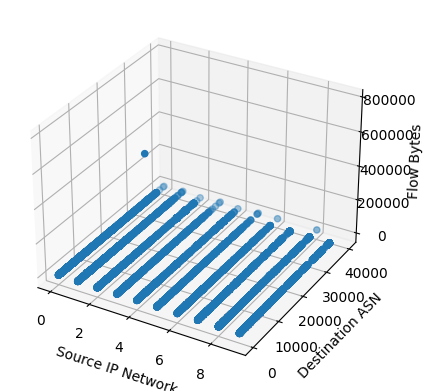

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['l_ipn'], df['r_asn'], df['f'])
ax.set_xlabel('Source IP Network')
ax.set_ylabel('Destination ASN')
ax.set_zlabel('Flow Bytes')
plt.show()